# Capstone Project - Car accident severity 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

### Background

A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved. 

Traffic collision affect the national economy as the cost of road injuries are estimated to account for 1.0% to 2.0% of the gross national product (GNP) of every country each year.
In 2013, 54 million people worldwide sustained injuries from traffic collisions.[1] This resulted in 1.4 million deaths in 2013, up from 1.1 million deaths in 1990 [2]   . About 68,000 of these occurred in children less than five years old. [3]


[1]  https://en.wikipedia.org/wiki/Traffic_collision

[2] Global Burden of Disease Study 2013, Collaborators (22 August 2015). "Global, regional, and national incidence, prevalence, and years lived with disability for 301 acute and chronic diseases and injuries in 188 countries, 1990-2013: a systematic analysis for the Global Burden of Disease Study 2013". Lancet. 386 (9995): 743–800. doi:10.1016/s0140-6736(15)60692-4. PMC 4561509. PMID 26063472.
    
[3] GBD 2013 Mortality and Causes of Death, Collaborators (17 December 2014). "Global, regional, and national age-sex specific all-cause and cause-specific mortality for 240 causes of death, 1990-2013: a systematic analysis for the Global Burden of Disease Study 2013". Lancet. 385 (9963): 117–71. doi:10.1016/S0140-6736(14)61682-2. PMC 4340604. PMID 25530442.

### Problem

Data about traffic collisions such as location, light condition, road condition, etc. is regularly collected by law enforcement agencies for statistical analysis purpose. 
This project aim is to analyze historical data about car accidents in order to determine factors which mostly impact on accident severity. I will be focusing on light conditions, road condition and location type (i.e. intersection, block,..) features to figure out if those factors play a role in accident severity and which actions might be taken to reduce impact.


## Data <a name="data"></a>

The data was collected by the Seattle Police Department and share by Coursera for this work. 
Dataset is publicly available at http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

It includes 221.144 accident records in the state of Seattle, from 2004 to the date it was issued, in which 37 attributes or variables are recorded and a codification of the type of accident is assigned among 84 available codes.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
%matplotlib inline

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-08 08:49:51--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  35.7MB/s   in 2.0s   

2020-09-08 08:49:54 (35.7 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Data preparation

Records include relevant information such as accident severity, road condition, light condition, and address type (i.e. intersection, block, alley):
* Severity code: a code that corresponds to the severity of the collision:
    * 3—fatality
    * 2b—serious injury
    * 2—injury
    * 1—prop damage
    * 0—unknown

The dataset records show severity code values 1 or 2 only. No other value is reported.

* Road condition: the condition of the road during the collision
    * i.e. 'Dry', 'Wet', ‘Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'
* Light condition: the light conditions during the collision.
    * 'Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'
* Address type: Collision address type.
    * ‘Alley’,  ‘Block’, ‘Intersection’

This project goal is to determine if address type, road and light conditions, can impact on accident severity.


In [5]:
# Dropping records with 'NaN' values within selected feature columns
df.dropna(subset = ['SEVERITYCODE', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE'], inplace=True)

In [6]:
# Dropping columns except for selected features
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC','INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis = 1, inplace=True)
df.head()
         

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
1,1,Block,Raining,Wet,Dark - Street Lights On
2,1,Block,Overcast,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight


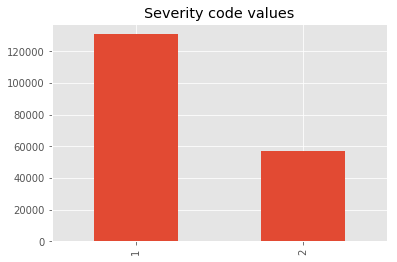

In [7]:
# Dataset is imbalanced
df['SEVERITYCODE'].value_counts()
df.SEVERITYCODE.value_counts().plot(kind='bar', title='Severity code values');

Random under-sampling:
2    56915
1    56915
Name: SEVERITYCODE, dtype: int64


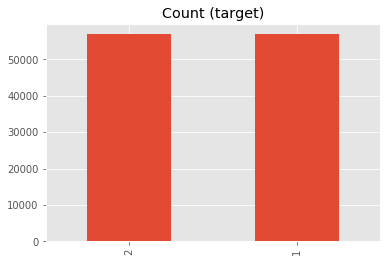

In [8]:
## Resampling imbalanced dataset

# Class count
count_class_1, count_class_2 = df.SEVERITYCODE.value_counts()

# Divide by class
df_class_1 = df[df['SEVERITYCODE'] == 1]
df_class_2 = df[df['SEVERITYCODE'] == 2]

df_class_1_under = df_class_1.sample(count_class_2)
df_test_under = pd.concat([df_class_1_under, df_class_2], axis=0)

print('Random under-sampling:')
print(df_test_under.SEVERITYCODE.value_counts())

df_test_under.SEVERITYCODE.value_counts().plot(kind='bar', title='Count (target)');

## Methodology <a name="methodology"></a>

Apparently light condition is not significantly impacting on accident severity:

In [9]:
df_light_sev1 = df_test_under[df_test_under['SEVERITYCODE']==1].drop(['ADDRTYPE','WEATHER', 'ROADCOND'], axis=1)
sev1 = df_light_sev1.groupby('LIGHTCOND').count()['SEVERITYCODE'].tolist()
labels = df_light_sev1.sort_values(by='LIGHTCOND')['LIGHTCOND'].unique().tolist()

df_light_sev2 = df_test_under[df_test_under['SEVERITYCODE']==2].drop(['ADDRTYPE','WEATHER', 'ROADCOND'], axis=1)
sev2 = df_light_sev2.groupby('LIGHTCOND').count()['SEVERITYCODE'].tolist()


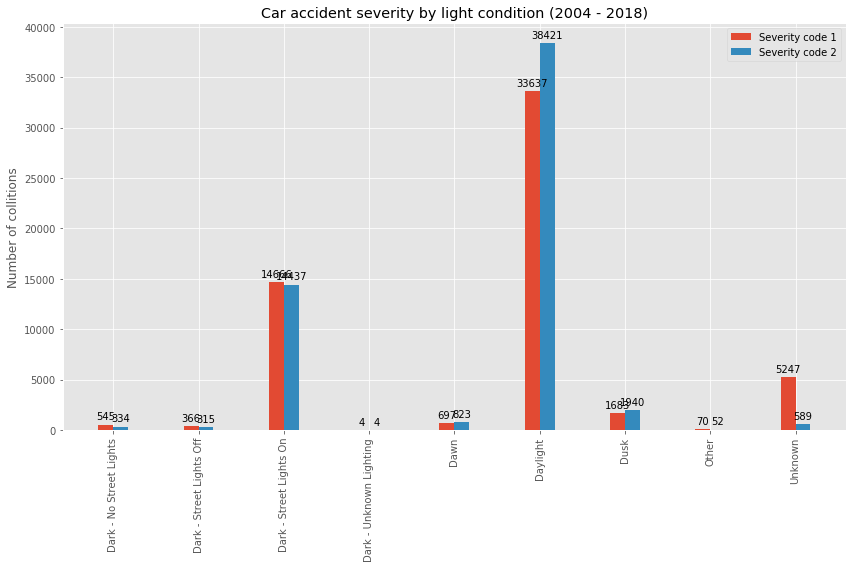

In [10]:
x = np.arange(len(labels)*2, step=2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, sev1, width, label='Severity code 1')
rects2 = ax.bar(x + width/2, sev2, width, label='Severity code 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of collitions')
ax.set_title('Car accident severity by light condition (2004 - 2018)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The same applies to road condition:

In [11]:
df_road_sev1 = df_test_under[df_test_under['SEVERITYCODE']==1].drop(['ADDRTYPE','WEATHER', 'LIGHTCOND'], axis=1)
sev1 = df_road_sev1.groupby('ROADCOND').count()['SEVERITYCODE'].tolist()
labels = df_road_sev1.sort_values(by='ROADCOND')['ROADCOND'].unique().tolist()

df_road_sev2 = df_test_under[df_test_under['SEVERITYCODE']==2].drop(['ADDRTYPE','WEATHER', 'LIGHTCOND'], axis=1)
sev2 = df_road_sev2.groupby('ROADCOND').count()['SEVERITYCODE'].tolist()

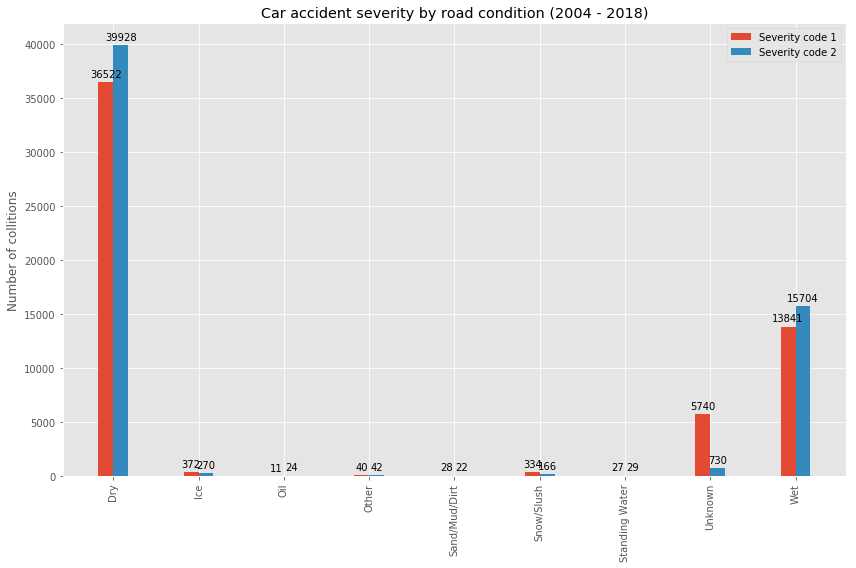

In [12]:
x = np.arange(len(labels)*2, step=2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, sev1, width, label='Severity code 1')
rects2 = ax.bar(x + width/2, sev2, width, label='Severity code 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of collitions')
ax.set_title('Car accident severity by road condition (2004 - 2018)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

When it comes to address type, we observe the following: collitions in intersections are typically more severe than ones in blocks. 

In [13]:
#Let's create the following lists: labels, severity code 1 value occurrences, severity 2 value occurrences
df_weather_sev1 = df_test_under[df_test_under['SEVERITYCODE']==1].drop(['WEATHER','ROADCOND', 'LIGHTCOND'], axis=1)
sev1 = df_weather_sev1.groupby('ADDRTYPE').count()['SEVERITYCODE'].tolist()
labels = df_weather_sev1.sort_values(by='ADDRTYPE')['ADDRTYPE'].unique().tolist()

df_weather_sev2 = df_test_under[df_test_under['SEVERITYCODE']==2].drop(['WEATHER','ROADCOND', 'LIGHTCOND'], axis=1)
sev2 = df_weather_sev2.groupby('ADDRTYPE').count()['SEVERITYCODE'].tolist()


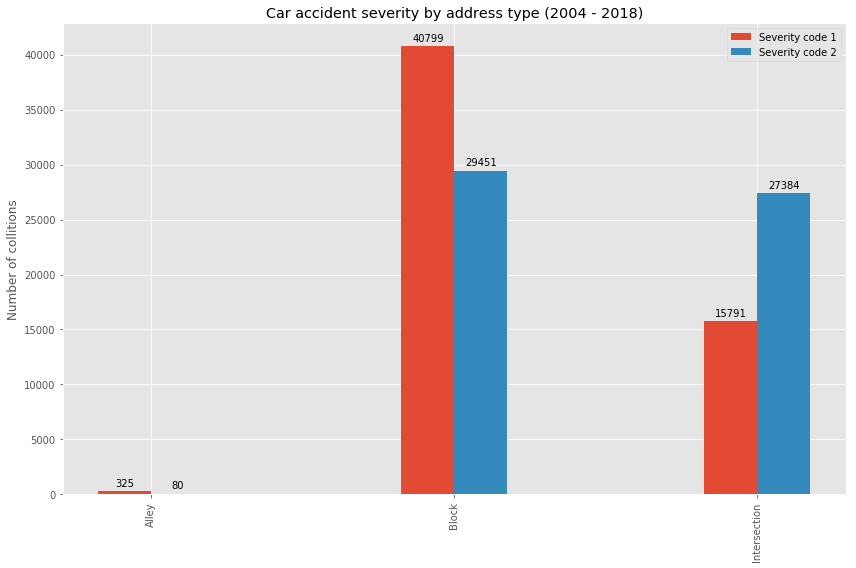

In [14]:
x = np.arange(len(labels)*2, step=2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, sev1, width, label='Severity code 1')
rects2 = ax.bar(x + width/2, sev2, width, label='Severity code 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of collitions')
ax.set_title('Car accident severity by address type (2004 - 2018)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [15]:
# I'm encoding light condition with 0,..8 values, ordered by ascending visibility
df_test_under['LIGHTCOND'].replace(to_replace=['Dark - Street Lights Off','Dark - No Street Lights', 'Dark - Unknown Lighting', 'Unknown','Other', 'Dusk', 'Dawn','Dark - Street Lights On','Daylight'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df_test_under.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
33406,1,Block,Clear,Wet,7
176866,1,Intersection,Clear,Dry,8
91106,1,Intersection,Raining,Wet,7
122390,1,Block,Clear,Dry,8
142913,1,Block,Clear,Dry,8


In [16]:
# I'm introducing a light condition class feature, assigning 1 value to optimal conditions, 0 the other ones.
df_test_under['lightcondclass'] = df_test_under['LIGHTCOND'].apply(lambda x: 1 if (x>7)  else 0)
df_test_under.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,lightcondclass
33406,1,Block,Clear,Wet,7,0
176866,1,Intersection,Clear,Dry,8,1
91106,1,Intersection,Raining,Wet,7,0
122390,1,Block,Clear,Dry,8,1
142913,1,Block,Clear,Dry,8,1


Looks like accident severity is higher when visibility is optimal, no matter if collition happens in intersections or blocks:

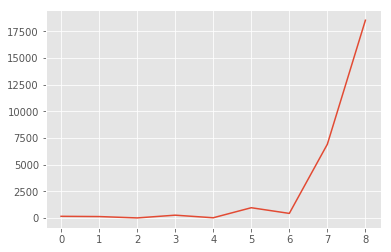

In [21]:
df_test_under_sev2 = df_test_under[df_test_under['SEVERITYCODE']==2]
df_lightcond_values = df_test_under_sev2[df_test_under_sev2['ADDRTYPE']=='Intersection'].drop(['WEATHER','ROADCOND', 'lightcondclass', 'SEVERITYCODE'], axis=1)
values = df_lightcond_values.groupby('LIGHTCOND').count()['ADDRTYPE'].tolist()

plt.plot([0,1,2,3,4,5,6,7,8], values)

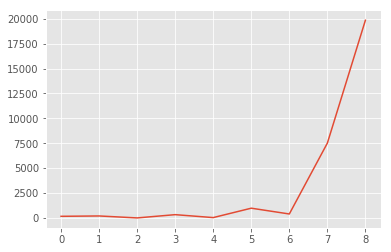

In [18]:
df_lightcond_values = df_test_under_sev2[df_test_under_sev2['ADDRTYPE']=='Block'].drop(['WEATHER','ROADCOND', 'lightcondclass', 'SEVERITYCODE'], axis=1)
values = df_lightcond_values.groupby('LIGHTCOND').count()['ADDRTYPE'].tolist()

plt.plot([0,1,2,3,4,5,6,7,8], values)

## Analysis <a name="analysis"></a>

In [138]:
X = df_test_under[['ADDRTYPE', 'LIGHTCOND', 'ROADCOND']].values
X[0:5]

array([['Intersection', 8, 'Dry'],
       ['Intersection', 8, 'Dry'],
       ['Intersection', 8, 'Dry'],
       ['Block', 8, 'Dry'],
       ['Block', 8, 'Dry']], dtype=object)

In [139]:
from sklearn import preprocessing
#le_lightcond = preprocessing.LabelEncoder()
#le_lightcond.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'])
#X[:,1] = le_lightcond.transform(X[:,1]) 

le_addr = preprocessing.LabelEncoder()
le_addr.fit([ 'Block', 'Intersection', 'Alley'])
X[:,0] = le_addr.transform(X[:,0])

le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit([ 'Dry', 'Wet', 'Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,2] = le_roadcond.transform(X[:,2])

#le_weather = preprocessing.LabelEncoder()
#le_weather.fit([ 'Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
#X[:,2] = le_weather.transform(X[:,2]) 


X[0:5]

array([[2, 8, 0],
       [2, 8, 0],
       [2, 8, 0],
       [1, 8, 0],
       [1, 8, 0]], dtype=object)

In [140]:
# Data Standardization give data zero mean and unit variance, it is good practice
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.27117226,  0.51153443, -0.69075604],
       [ 1.27117226,  0.51153443, -0.69075604],
       [ 1.27117226,  0.51153443, -0.69075604],
       [-0.76636207,  0.51153443, -0.69075604],
       [-0.76636207,  0.51153443, -0.69075604]])

In [141]:
y = df_test_under['SEVERITYCODE']
y[0:5]

151514    1
57004     1
182513    1
15317     1
173219    1
Name: SEVERITYCODE, dtype: int64

In [142]:

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. 

In [143]:

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('X_trainset.shape: ', X_trainset.shape)
print('y_trainset.shape: ', y_trainset.shape)

X_trainset.shape:  (79681, 3)
y_trainset.shape:  (79681,)


In [144]:
from sklearn.tree import DecisionTreeClassifier

sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
sevTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
sevTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
predTree = sevTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])
print("Decision Tree: Avg F1-score: %.4f" % f1_score(y_testset, predTree, average='weighted'))
print("Decision Tree: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, predTree))

[1 1 1 1 1]
121302    1
82626     1
3224      2
191121    1
79839     1
Name: SEVERITYCODE, dtype: int64
Decision Tree: Avg F1-score: 0.5946
Decision Tree: Jaccard score: 0.6012


In [147]:
from sklearn import svm
sev_svm = svm.SVC(kernel='linear')

sev_svm.fit(X_trainset, y_trainset) 
yhat_svm = sev_svm.predict(X_testset)
print("SVM: Avg F1-score: %.4f" % f1_score(y_testset, yhat_svm, average='weighted'))
print("SVM: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, yhat_svm))

SVM: Avg F1-score: 0.5940
SVM: Jaccard score: 0.6000


In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc



array([0.48572433, 0.48218103, 0.49667633, 0.53415913, 0.54473045,
       0.54443761, 0.5462239 , 0.54806876, 0.54757094])

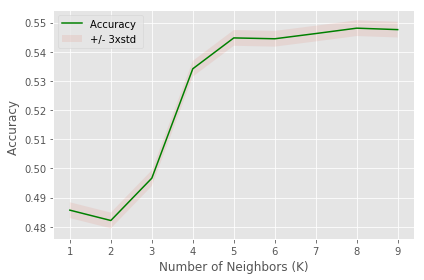

The best accuracy was with 0.5480687575038801 with k= 8


In [149]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [150]:
k = 8
#Train Model and Predict  
Kneigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
Kneigh

yhat_knn = Kneigh.predict(X_testset)
print("KNN: Avg F1-score: %.4f" % f1_score(y_testset, yhat_knn, average='weighted'))
print("KNN: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, yhat_knn))

KNN: Avg F1-score: 0.4989
KNN: Jaccard score: 0.5481


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)


yhat_lr = LR.predict(X_testset)
yhat_prob = LR.predict_proba(X_testset)
print("Logistic Regression: Avg F1-score: %.4f" % f1_score(y_testset, yhat_lr, average='weighted'))
print("Logistic regression: Jaccard score: %.4f" % jaccard_similarity_score(y_testset, yhat_lr))
print("Logistic regression: Log Loss: %.4f" % log_loss(y_testset, yhat_prob))



Logistic Regression: Avg F1-score: 0.5938
Logistic regression: Jaccard score: 0.6010
Logistic regression: Log Loss: 0.6626
